In [1]:
pip install -q jmd_imagescraper

Note: you may need to restart the kernel to use updated packages.


In [2]:
from fastai.vision.all import *
from fastai.vision.widgets import *

from jmd_imagescraper.core import *
from jmd_imagescraper.imagecleaner import *

In [3]:

# First let's create a path object to store downloaded images
path = Path('Images')
if not path.is_dir():
    path.mkdir()

# Define the folder name and search string dict
imgs = {"This is a beer": "beer",
        "This is a wine": "wine"}

# Download the images into path
for fol_name, sch_str in imgs.items():
    duckduckgo_search(path, fol_name, sch_str, max_results=4)


Duckduckgo search: beer


Duckduckgo search: wine


8


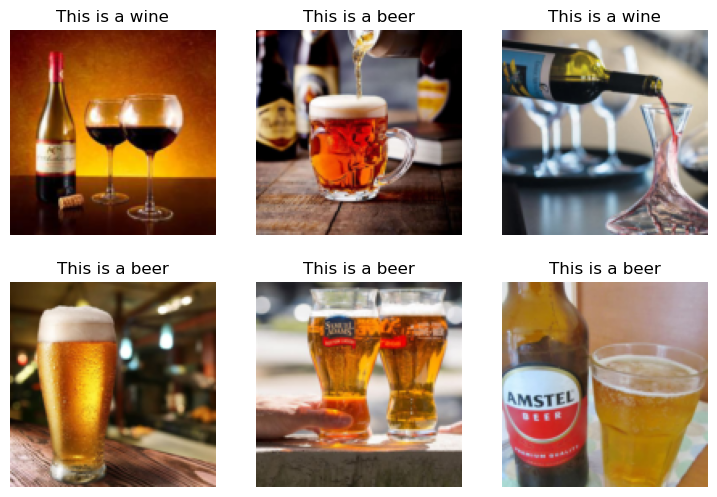

In [4]:
images = get_image_files(path)
print(len(images))

# Create the datablock object for the bears dataset
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)
# Create a dataloaders from dblock
dls = bears.dataloaders(path, bs=6)

# Display few samples from batch
dls.show_batch()